Theran Meadows

Student Meantal Health

Introduction:
The data set, Student Meantal Health, was taken and measured from Google Forms ven to university students to measure their mental health and academic standing. It observes and measures such things as gender, age, current educational course, year in school, current grade point average, marital status, and other health questions that tell of the students currrent mental well being on a subjective scale.



Question: Is there a greater trend of depression, anxiety, or panic attacks in students in year one thatn any other year?

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Load adn preview the data
student_mental_health_data = pd.read_csv("/Users/theranmeadows/Desktop/dsc550datamining/week2/data/Student Mental health.csv")
student_mental_health_data.head(5)
student_mental_health_data


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


I want to find out if there is a greater trend of depression among the first year students. The reasoning behind this questions is that I want to see if there is data to support that students that are inexperienced with the pressures and responsibilities of college/ adult life are more depressed, anxious, or suffer panic attacks more often that experienced students. 

First I will make a new data frame with columns for "Your current year of Study" and the depression column.

In [85]:
# new data frame
dep_anx_pan = student_mental_health_data[["Your current year of Study", "Do you have Depression?"]]
dep_anx_pan["Your current year of Study"].value_counts()

Your current year of Study
year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: count, dtype: int64

In [21]:
# some light cleaning is in order for the use of "Year" and "year"
dep_anx_pan["Your current year of Study"] = dep_anx_pan["Your current year of Study"].str.lower()
dep_anx_pan["Your current year of Study"].value_counts()


/var/folders/w7/y9m37qn9069d8533jsyhz90r0000gn/T/ipykernel_8826/3408995231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_anx_pan["Your current year of Study"] = dep_anx_pan["Your current year of Study"].str.lower()


Your current year of Study
year 1    43
year 2    26
year 3    24
year 4     8
Name: count, dtype: int64

Now that I know how many students are first year and how many are not, I can make visual graphs of to help answer my question.

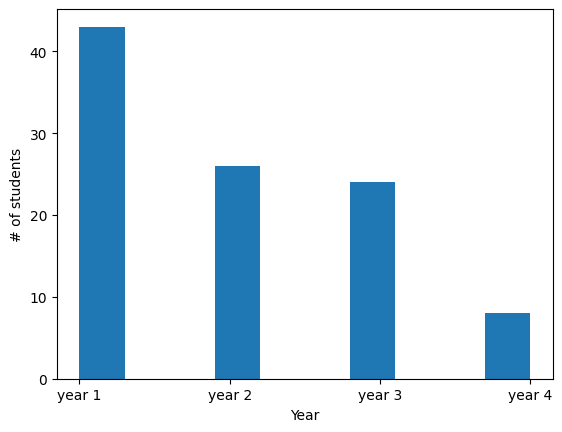

In [24]:
# histogram of the yar of students

plt.hist(dep_anx_pan["Your current year of Study"])
plt.xlabel("Year")
plt.ylabel("# of students")
plt.show()

In [81]:
# count of yes and no for all years for depression
yr_count = dep_anx_pan.groupby("Your current year of Study").value_counts()
yr_count

Your current year of Study  Do you have Depression?
year 1                      No                         29
                            Yes                        14
year 2                      No                         16
                            Yes                        10
year 3                      No                         14
                            Yes                        10
year 4                      No                          7
                            Yes                         1
Name: count, dtype: int64

<BarContainer object of 2 artists>

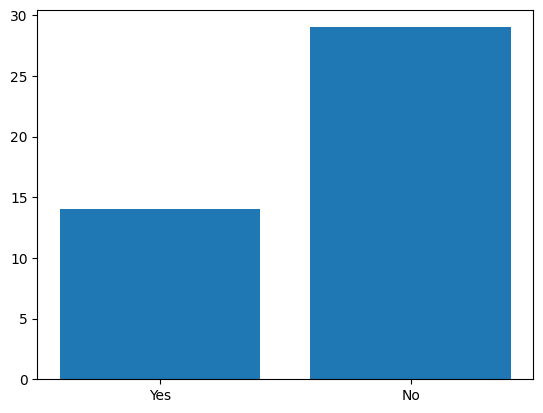

In [82]:
# graph for Yes and No answer for depression in first year students


first_yr_depression = len(dep_anx_pan[(dep_anx_pan["Your current year of Study"] == "year 1") & (dep_anx_pan["Do you have Depression?"] == "Yes")])
first_yr_nodepression = len(dep_anx_pan[(dep_anx_pan["Your current year of Study"] == "year 1") & (dep_anx_pan["Do you have Depression?"] == "No")])

x = ["Yes", "No"]
y = [first_yr_depression, first_yr_nodepression]
plt.bar(x, y)

<BarContainer object of 2 artists>

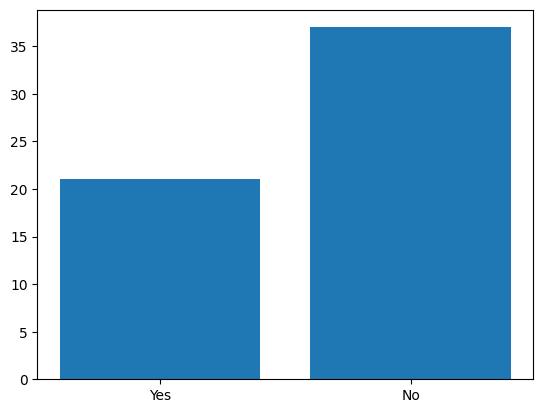

In [84]:
other_yr_depression = len(dep_anx_pan[(dep_anx_pan["Your current year of Study"] != "year 1") & (dep_anx_pan["Do you have Depression?"] == "Yes")])
other_yr_nodepression = len(dep_anx_pan[(dep_anx_pan["Your current year of Study"] != "year 1") & (dep_anx_pan["Do you have Depression?"] == "No")])

x = ["Yes", "No"]
y = [other_yr_depression, other_yr_nodepression]
plt.bar(x, y)



From the first visual, it shows the number of stundents in each year. We can see there is a very high ratio of first year students to all other years. 
As a whole, becasue first year students occupy the majority of the data. there may be skewed results for responses with depression. 

From the second visual, it shows the count of responses for first year students only that have or dont have depreseeion. There is about have as many students that responded yes to having depression than to those that responded no. 

From the third visual, it shows all other years than first year that responded yes and no to depression. it looks similar to the previous visual with a slight increase in yes responses.

In conclusion though, with a quick investigation and rough measuring, we can say yes to our question. There does appear to be more debression in first year students than any other grade. More investigation is warranted to be sure like mesuring 2nd, 3rd, and fourth year students individually. It would also be good to measure the values of the other columns like "Do you have Panic attacks?" and "Do you have Anxiety". 